In [ ]:
from google.colab import drive
from tensorflow.keras.utils import *
drive.mount('/content/drive')

Mounted at /content/drive


# Load data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/My Drive/vector/300K_v1/200k_256_v1.csv")
data = data.drop("id", axis=1)
print(data)

             x_0       x_1       x_2  ...     x_254     x_255  label
0      -0.100517 -0.021390 -0.039727  ...  0.070464 -0.035338      0
1      -0.091714 -0.014438 -0.035428  ...  0.057715 -0.037084      0
2      -0.416220 -0.460500 -0.068437  ...  0.578226 -0.414285      0
3      -0.116968 -0.015271 -0.060899  ...  0.074271 -0.032795      0
4      -0.121826 -0.013018 -0.056550  ...  0.080238 -0.034896      0
...          ...       ...       ...  ...       ...       ...    ...
278374 -0.673990 -0.010689 -0.136152  ...  0.065821 -0.784430      1
278375 -0.534702 -0.000182 -0.188856  ...  0.092274 -0.773430      1
278376 -0.163942 -0.051797 -0.052165  ...  0.232668 -0.205006      1
278377 -0.188449 -0.058028 -0.052221  ...  0.184313 -0.165739      1
278378 -0.541679  0.009125 -0.114659  ...  0.017434 -0.778357      1

[278379 rows x 257 columns]


# Process data

In [ ]:
from tensorflow.keras.utils import to_categorical
label = data["label"].to_numpy()
label = np.reshape(label, (label.shape[0], 1))
label = to_categorical(label, num_classes = 2)
feature = data.drop("label", axis=1).to_numpy()

print(label.shape, feature.shape)

(278379, 2) (278379, 256)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state = 42, test_size = 0.2,shuffle = True)

# MLP model

In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam

def define_model(class_count = label.shape[1], shape = (feature.shape[1],)):
  model = Sequential()
  model.add(Dense(512, activation = 'tanh', input_shape= shape))
  model.add(Dense(512, activation = 'tanh'))
  model.add(Dense(512, activation = 'tanh'))
  model.add(Dense(512, activation = 'tanh'))
  model.add(Dense(512, activation = 'tanh'))
  model.add(Dense(512, activation = 'tanh'))
  model.add(Dense(class_count))
  model.add(Activation('softmax'))
  model.compile(optimizer = Adam(lr = 0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  print(model.summary())
  return model

# Training

In [ ]:
import time
model = define_model()

t1 = time.time()
history = model.fit(X_train, y_train, batch_size = 36, epochs = 50,validation_split = 0.2, shuffle = True)
t2 = time.time()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1

# Report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score, f1_score

t3 = time.time()
y_pred = model.predict(X_test)
t4 = time.time()
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)



target_name = ['clean', 'malware']
print(classification_report(label_true, label_pred, target_names = target_name))

matrix = confusion_matrix(label_true, label_pred)

print("\n\n")


print("\n---detail----\n")


print("---precision--- ")
print("macro : ", precision_score(label_true, label_pred, average='macro'))
print("micro : ", precision_score(label_true, label_pred, average='micro'))
print("weighted : ", precision_score(label_true, label_pred, average='weighted'))
print("each class : ", precision_score(label_true, label_pred, average=None))

print("\n---recall--- ")
print("macro : ", recall_score(label_true, label_pred, average='macro'))
print("micro : ", recall_score(label_true, label_pred, average='micro'))
print("weighted : ", recall_score(label_true, label_pred, average='weighted'))
print("each class : ", recall_score(label_true, label_pred, average=None))

print("\n---f1 score--- ")
print("macro : ", f1_score(label_true, label_pred, average='macro'))
print("micro : ", f1_score(label_true, label_pred, average='micro'))
print("weighted : ", f1_score(label_true, label_pred, average='weighted'))
print("each class : ", f1_score(label_true, label_pred, average=None))

print("\n---Acc score--- ")
print(accuracy_score(label_true, label_pred))
print("\n---FPR score--- ")
print(matrix[1][0]/(matrix[1][0]+matrix[1][1]))
print("\n---matrix--- ")
print(matrix)
print("\n---time--- ")
print("train", t2-t1)
print("test", t4-t3)


              precision    recall  f1-score   support

       clean       0.98      0.99      0.99     41567
     malware       0.96      0.95      0.96     14109

    accuracy                           0.98     55676
   macro avg       0.97      0.97      0.97     55676
weighted avg       0.98      0.98      0.98     55676





---detail----

---precision--- 
macro :  0.9716828588731745
micro :  0.9779617788634241
weighted :  0.9779267595356499
each class :  [0.98434348 0.95902223]

---recall--- 
macro :  0.9699776366450646
micro :  0.9779617788634241
weighted :  0.9779617788634241
each class :  [0.98616691 0.95378836]

---f1 score--- 
macro :  0.9708262456694836
micro :  0.9779617788634241
weighted :  0.9779418247666043
each class :  [0.98525435 0.95639814]

---Acc score--- 
0.9779617788634241

---FPR score--- 
0.046211637961584805

---matrix--- 
[[40992   575]
 [  652 13457]]

---time--- 
train 876.1513075828552
test 1.522012710571289


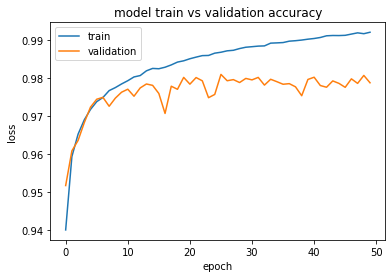

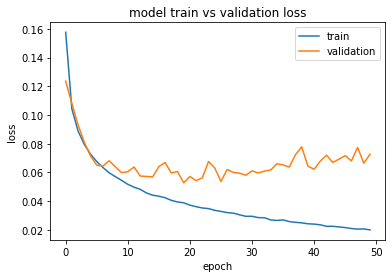

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()